In [524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.linear_model import LinearRegression


In [525]:
df=pd.read_csv("bitcoin.csv")

In [526]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [528]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [529]:
df.drop(columns=["Date"],inplace=True)

In [530]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [531]:
df.drop_duplicates().sum()

Open         3.068685e+07
High         3.150958e+07
Low          2.977668e+07
Close        3.072178e+07
Adj Close    3.072178e+07
Volume       3.989363e+13
dtype: float64

In [532]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


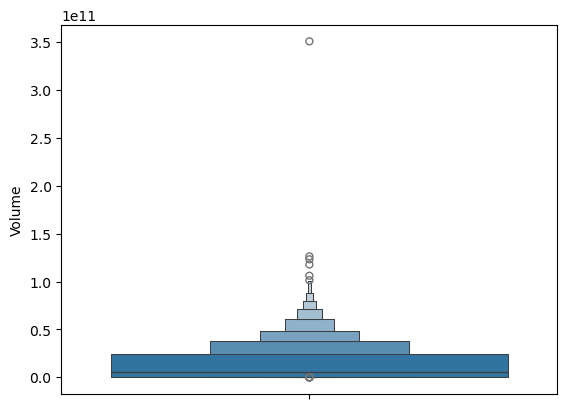

In [533]:
sns.boxenplot(y="Volume",data=df)
plt.show()

# Train & testing DataSet

In [534]:
y=df["Volume"]

In [535]:
print(y)

0          21056800
1          34483200
2          37919700
3          36863600
4          26580100
           ...     
2708    22721659051
2709    19792547657
2710    26246662813
2711    23310007704
2712    22263900160
Name: Volume, Length: 2713, dtype: int64


In [536]:
x=df.drop(columns=["Volume"],axis=1)

In [537]:
print(x)

              Open          High           Low         Close     Adj Close
0       465.864014    468.174011    452.421997    457.334015    457.334015
1       456.859985    456.859985    413.104004    424.440002    424.440002
2       424.102997    427.834991    384.532013    394.795990    394.795990
3       394.673004    423.295990    389.882996    408.903992    408.903992
4       408.084991    412.425995    393.181000    398.821014    398.821014
...            ...           ...           ...           ...           ...
2708  42586.464844  44667.218750  42491.035156  44575.203125  44575.203125
2709  44578.277344  44578.277344  43456.691406  43961.859375  43961.859375
2710  43937.070313  44132.972656  40249.371094  40538.011719  40538.011719
2711  40552.132813  40929.152344  39637.617188  40030.976563  40030.976563
2712  40022.132813  40246.027344  40010.867188  40126.429688  40126.429688

[2713 rows x 5 columns]


Training the model using for linear Regression

In [538]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=25,test_size=0.2)

In [539]:
lr=LinearRegression()

In [540]:
lr.fit(x_test,y_test)

LinearRegression()

In [541]:
test_prd=lr.predict(x_test)

In [542]:
lr.score(x_test,y_test)*100

60.61198791591285

In [543]:
lr.score(x_train,y_train)*100

59.04486287150681

# Prediction 

In [544]:

input_data=(465.864014,468.174011,452.421997,457.334015,457.334015)
input_data_array=np.asarray(input_data)
input_reshape=input_data_array.reshape(1,-1)
prediction=lr.predict(input_reshape)
print(f" Bitcoin  Volume is {prediction}")





 Bitcoin  Volume is [5.05822539e+09]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
